In [1]:
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer
from pathlib import Path
import nltk
from nltk.corpus import stopwords
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from pathlib import Path
import imageio
from wordcloud import WordCloud
from PIL import Image

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stops = stopwords.words('english')
sorted(stops)

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
path_text = Path('pokerface.txt').read_text()
song_lyrics = TextBlob(Path('pokerface.txt').read_text())

In [5]:
lyrics = song_lyrics.word_counts.items()
#### if error on word_counts.lyrics() -> change to word_counts.items()
lyrics

dict_items([('mum-mum-mum-mah', 15), ('i', 21), ('wan', 2), ('na', 2), ('hold', 1), ('em', 3), ('like', 13), ('they', 1), ('do', 1), ('in', 2), ('texas', 1), ('please', 1), ('fold', 1), ('let', 1), ('hit', 1), ('me', 14), ('raise', 1), ('it', 6), ('baby', 2), ('stay', 1), ('with', 6), ('love', 5), ('game', 1), ('intuition', 1), ('play', 2), ('the', 4), ('cards', 1), ('spades', 1), ('to', 1), ('start', 1), ('and', 2), ('after', 1), ('he', 11), ('s', 15), ('been', 1), ('hooked', 1), ('ll', 5), ('one', 1), ('that', 2), ('on', 1), ('his', 1), ('heart', 1), ('oh', 24), ('whoa', 4), ('get', 4), ('him', 9), ('hot', 4), ('show', 4), ('what', 4), ('ve', 4), ('got', 15), ('ca', 30), ("n't", 32), ('read', 30), ('my', 32), ('no', 10), ('poker', 10), ('face', 30), ('she', 11), ('nobody', 11), ('p-p-p-poker', 10), ('p-p-poker', 10), ('roll', 1), ('a', 4), ('hard', 1), ('pair', 1), ('we', 1), ('will', 1), ('be', 1), ('hey', 1), ('little', 1), ('gamblin', 1), ('is', 3), ('fun', 3), ('when', 2), ('you'

In [6]:
lyrics = [lyric for lyric in lyrics if lyric[0] not in stops]

In [7]:
sorted_lyrics = sorted(lyrics, key=itemgetter(1), reverse=True)

In [8]:
top20_lyrics = sorted_lyrics[1:21]

In [9]:
top20_lyrics

[('ca', 30),
 ('read', 30),
 ('face', 30),
 ('oh', 24),
 ('mum-mum-mum-mah', 15),
 ('got', 15),
 ('like', 13),
 ('nobody', 11),
 ('poker', 10),
 ('p-p-p-poker', 10),
 ('p-p-poker', 10),
 ('love', 5),
 ('whoa', 4),
 ('get', 4),
 ('hot', 4),
 ('show', 4),
 ('em', 3),
 ('fun', 3),
 ('wan', 2),
 ('na', 2)]

In [10]:
df_lyrics = pd.DataFrame(top20_lyrics, columns=['Lyric', 'Count'])

In [11]:
axis = df_lyrics.plot.bar(x='Lyric', y='Count', legend=False)
plt.gcf().tight_layout()

<IPython.core.display.Javascript object>

In [18]:
mask_image = imageio.imread('mask_circle.png')
wordcloud = WordCloud(width=500, height=500,
                     colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(path_text)
wordcloud = wordcloud.to_file('mask_musicnote_output.png')

In [13]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>

In [6]:
for char in '-.,\n':
    path_text = path_text.replace(char,"")
path_text = path_text.lower()

In [7]:
print(path_text)

mummummummahmummummummahmummummummahmummummummahmummummummahi wanna hold 'em like they do in texas pleasefold 'em let 'em hit me raise it baby stay with me (i love it)love game intuition play the cards with spades to startand after he's been hooked i'll play the one that's on his heartoh whoa oh ohoh oh ohi'll get him hot show him what i've gotoh whoa oh ohoh oh ohi'll get him hot show him what i've gotcan't read my can't read myno he can't read my poker face(she's got me like nobody)can't read my can't read myno he can't read my poker face(she's got me like nobody)ppppoker face pppoker face (mummummummah)ppppoker face pppoker face (mummummummah)i wanna roll with him a hard pair we will be (hey)a little gamblin' is fun when you're with me (i love it)russian roulette is not the same without a gunand baby when it's love if it's not rough it isn't fun (fun)oh whoa oh ohoh oh ohi'll get him hot show him what i've gotoh whoa oh ohoh oh ohi'll get him hot show him what i've gotcan't read my 

In [8]:
non_filtered_lyrics = path_text.split()
print(non_filtered_lyrics)

['mummummummahmummummummahmummummummahmummummummahmummummummahi', 'wanna', 'hold', "'em", 'like', 'they', 'do', 'in', 'texas', 'pleasefold', "'em", 'let', "'em", 'hit', 'me', 'raise', 'it', 'baby', 'stay', 'with', 'me', '(i', 'love', 'it)love', 'game', 'intuition', 'play', 'the', 'cards', 'with', 'spades', 'to', 'startand', 'after', "he's", 'been', 'hooked', "i'll", 'play', 'the', 'one', "that's", 'on', 'his', 'heartoh', 'whoa', 'oh', 'ohoh', 'oh', "ohi'll", 'get', 'him', 'hot', 'show', 'him', 'what', "i've", 'gotoh', 'whoa', 'oh', 'ohoh', 'oh', "ohi'll", 'get', 'him', 'hot', 'show', 'him', 'what', "i've", "gotcan't", 'read', 'my', "can't", 'read', 'myno', 'he', "can't", 'read', 'my', 'poker', "face(she's", 'got', 'me', 'like', "nobody)can't", 'read', 'my', "can't", 'read', 'myno', 'he', "can't", 'read', 'my', 'poker', "face(she's", 'got', 'me', 'like', 'nobody)ppppoker', 'face', 'pppoker', 'face', '(mummummummah)ppppoker', 'face', 'pppoker', 'face', '(mummummummah)i', 'wanna', 'roll',

In [9]:
count = {}
for word in non_filtered_lyrics:
    count[word] = count.get(word, 0) + 1
count

{'mummummummahmummummummahmummummummahmummummummahmummummummahi': 1,
 'wanna': 2,
 'hold': 1,
 "'em": 3,
 'like': 13,
 'they': 1,
 'do': 1,
 'in': 2,
 'texas': 1,
 'pleasefold': 1,
 'let': 1,
 'hit': 1,
 'me': 14,
 'raise': 1,
 'it': 2,
 'baby': 2,
 'stay': 1,
 'with': 6,
 '(i': 2,
 'love': 4,
 'it)love': 1,
 'game': 1,
 'intuition': 1,
 'play': 2,
 'the': 4,
 'cards': 1,
 'spades': 1,
 'to': 1,
 'startand': 1,
 'after': 1,
 "he's": 1,
 'been': 1,
 'hooked': 1,
 "i'll": 1,
 'one': 1,
 "that's": 1,
 'on': 1,
 'his': 1,
 'heartoh': 1,
 'whoa': 4,
 'oh': 8,
 'ohoh': 4,
 "ohi'll": 4,
 'get': 4,
 'him': 9,
 'hot': 4,
 'show': 4,
 'what': 4,
 "i've": 4,
 'gotoh': 2,
 "gotcan't": 2,
 'read': 30,
 'my': 22,
 "can't": 20,
 'myno': 10,
 'he': 10,
 'poker': 10,
 "face(she's": 11,
 'got': 11,
 "nobody)can't": 7,
 'nobody)ppppoker': 4,
 'face': 18,
 'pppoker': 10,
 '(mummummummah)ppppoker': 5,
 '(mummummummah)i': 1,
 'roll': 1,
 'a': 3,
 'hard': 1,
 'pair': 1,
 'we': 1,
 'will': 1,
 'be': 1,
 '(hey

In [10]:
lyric_freq = []
for key, value in count.items():
    lyric_freq.append((key, value))
lyric_freq    

[('mummummummahmummummummahmummummummahmummummummahmummummummahi', 1),
 ('wanna', 2),
 ('hold', 1),
 ("'em", 3),
 ('like', 13),
 ('they', 1),
 ('do', 1),
 ('in', 2),
 ('texas', 1),
 ('pleasefold', 1),
 ('let', 1),
 ('hit', 1),
 ('me', 14),
 ('raise', 1),
 ('it', 2),
 ('baby', 2),
 ('stay', 1),
 ('with', 6),
 ('(i', 2),
 ('love', 4),
 ('it)love', 1),
 ('game', 1),
 ('intuition', 1),
 ('play', 2),
 ('the', 4),
 ('cards', 1),
 ('spades', 1),
 ('to', 1),
 ('startand', 1),
 ('after', 1),
 ("he's", 1),
 ('been', 1),
 ('hooked', 1),
 ("i'll", 1),
 ('one', 1),
 ("that's", 1),
 ('on', 1),
 ('his', 1),
 ('heartoh', 1),
 ('whoa', 4),
 ('oh', 8),
 ('ohoh', 4),
 ("ohi'll", 4),
 ('get', 4),
 ('him', 9),
 ('hot', 4),
 ('show', 4),
 ('what', 4),
 ("i've", 4),
 ('gotoh', 2),
 ("gotcan't", 2),
 ('read', 30),
 ('my', 22),
 ("can't", 20),
 ('myno', 10),
 ('he', 10),
 ('poker', 10),
 ("face(she's", 11),
 ('got', 11),
 ("nobody)can't", 7),
 ('nobody)ppppoker', 4),
 ('face', 18),
 ('pppoker', 10),
 ('(mummum

In [11]:
sorted_lyric_freq = sorted(lyric_freq, key=itemgetter(1), reverse=True)

In [12]:
top20_lyric_freq = sorted_lyric_freq[1:21]

In [13]:
top20_lyric_freq

[('my', 22),
 ("can't", 20),
 ('face', 18),
 ('me', 14),
 ('like', 13),
 ("face(she's", 11),
 ('got', 11),
 ('myno', 10),
 ('he', 10),
 ('poker', 10),
 ('pppoker', 10),
 ('him', 9),
 ('oh', 8),
 ("nobody)can't", 7),
 ('with', 6),
 ('(mummummummah)ppppoker', 5),
 ('love', 4),
 ('the', 4),
 ('whoa', 4),
 ('ohoh', 4)]

<IPython.core.display.Javascript object>


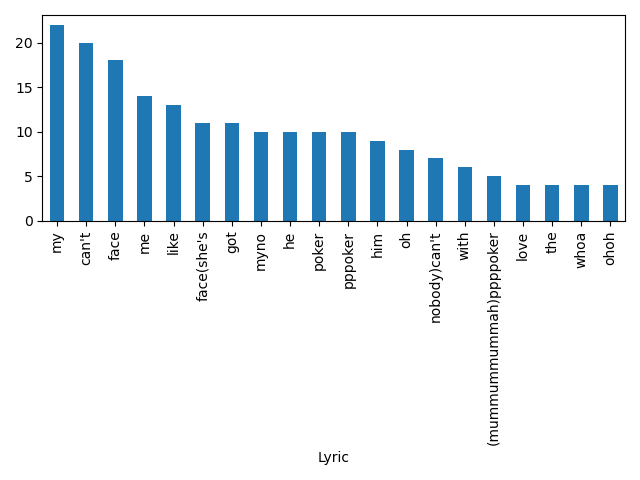

In [14]:
df_lyric_freq = pd.DataFrame(top20_lyric_freq, columns=['Lyric', 'Count'])
axis = df_lyric_freq.plot.bar(x='Lyric', y='Count', legend=False)
plt.gcf().tight_layout()